In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = np.load('train.npz') 

In [3]:
X_train = train['X_train']
y_train = train['y_train']

In [4]:
test = np.load('test.npz')

In [5]:
X_test = test['X_test']
y_test = test['y_test']

In [6]:
X_train.shape

(8005, 150, 150, 3)

In [7]:
X_test.shape

(2023, 150, 150, 3)

In [8]:
import keras

Using TensorFlow backend.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D

In [10]:
model = Sequential()
    
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
    
model.add(Flatten())
    
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Train on 8005 samples, validate on 2023 samples
Epoch 1/20
8005/8005 [==============================] - 465s 58ms/step - loss: 0.8217 - accuracy: 0.4983 - val_loss: 0.6924 - val_accuracy: 0.5517
Epoch 2/20
8005/8005 [==============================] - 598s 75ms/step - loss: 0.6865 - accuracy: 0.5409 - val_loss: 0.6738 - val_accuracy: 0.5759
Epoch 3/20
8005/8005 [==============================] - 519s 65ms/step - loss: 0.6544 - accuracy: 0.6011 - val_loss: 0.6166 - val_accuracy: 0.6742
Epoch 4/20
8005/8005 [==============================] - 463s 58ms/step - loss: 0.6079 - accuracy: 0.6611 - val_loss: 0.5882 - val_accuracy: 0.6693
Epoch 5/20
8005/8005 [==============================] - 707s 88ms/step - loss: 0.5628 - accuracy: 0.7072 - val_loss: 0.5646 - val_accuracy: 0.7049
Epoch 6/20
8005/8005 [==============================] - 530s 66ms/step - loss: 0.5368 - accuracy: 0.7284 - val_loss: 0.5233 - val_accuracy: 0.7375
Epoch 7/20
8005/8005 [==============================] - 464s 58ms/step

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(round(accuracy * 100,3))

2023/2023 [==============================] - 271s 134ms/step
83.342


In [17]:
print(f"Accuracy: {round(accuracy * 100,3)}%")

Accuracy: 83.342%


In [18]:
model.save('best_cat_dog_classifier.h5')

In [19]:
import cv2
import os
def show_predict(img, model):
    plt.imshow(img)
    img = img.reshape((1,150,150,3))
    pred = model.predict(img)
    if pred[0][0]==1:
        print("The image belongs to CAT category.")
    else:
        print("The image belongs to DOG category.")

In [29]:
img = cv2.imread(os.path.join("cat-and-dog/real_test",'dog.jpg'))
img = cv2.resize(img, (150,150))

The image belongs to DOG category.


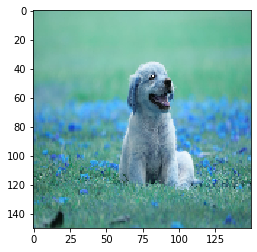

In [30]:
show_predict(img, model)

The image belongs to CAT category.


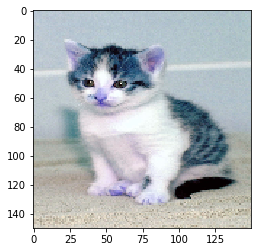

In [33]:
img = cv2.imread(os.path.join("cat-and-dog/real_test",'cat.jpg'))
img = cv2.resize(img, (150,150))
show_predict(img, model)